In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

# Loading Data

In [43]:
df = pd.read_csv('Student performance in mathematics.csv')
print(df.head())

   Student ID  Gender Race/ethnicity Parental level of education Lunch  \
0           1  Female        Group B           Bachelor's degree   Yes   
1           2  Female        Group C                Some college    No   
2           3  Female        Group B             Master's degree    No   
3           4    Male        Group A          Associate's degree   Yes   
4           5    Male        Group C                Some college   Yes   

  Test preparation course  Math score  Reading score  Writing score  
0               Completed          72             72             74  
1                    None          69             90             88  
2               Completed          90             95             93  
3                    None          47             57             44  
4                    None          76             78             75  


# Preprocessing 

In [44]:
df = df.drop(df.columns[0], axis=1)
print(df.head())

   Gender Race/ethnicity Parental level of education Lunch  \
0  Female        Group B           Bachelor's degree   Yes   
1  Female        Group C                Some college    No   
2  Female        Group B             Master's degree    No   
3    Male        Group A          Associate's degree   Yes   
4    Male        Group C                Some college   Yes   

  Test preparation course  Math score  Reading score  Writing score  
0               Completed          72             72             74  
1                    None          69             90             88  
2               Completed          90             95             93  
3                    None          47             57             44  
4                    None          76             78             75  


## Null values?

In [45]:
print(df.isnull().sum())

Gender                         0
Race/ethnicity                 0
Parental level of education    0
Lunch                          0
Test preparation course        0
Math score                     0
Reading score                  0
Writing score                  0
dtype: int64


## Relationships between Features

               Math score  Reading score  Writing score
Math score       1.000000       0.920590       0.938897
Reading score    0.920590       1.000000       0.983069
Writing score    0.938897       0.983069       1.000000


C:\Users\fatih\AppData\Local\Temp\ipykernel_22344\2343619922.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


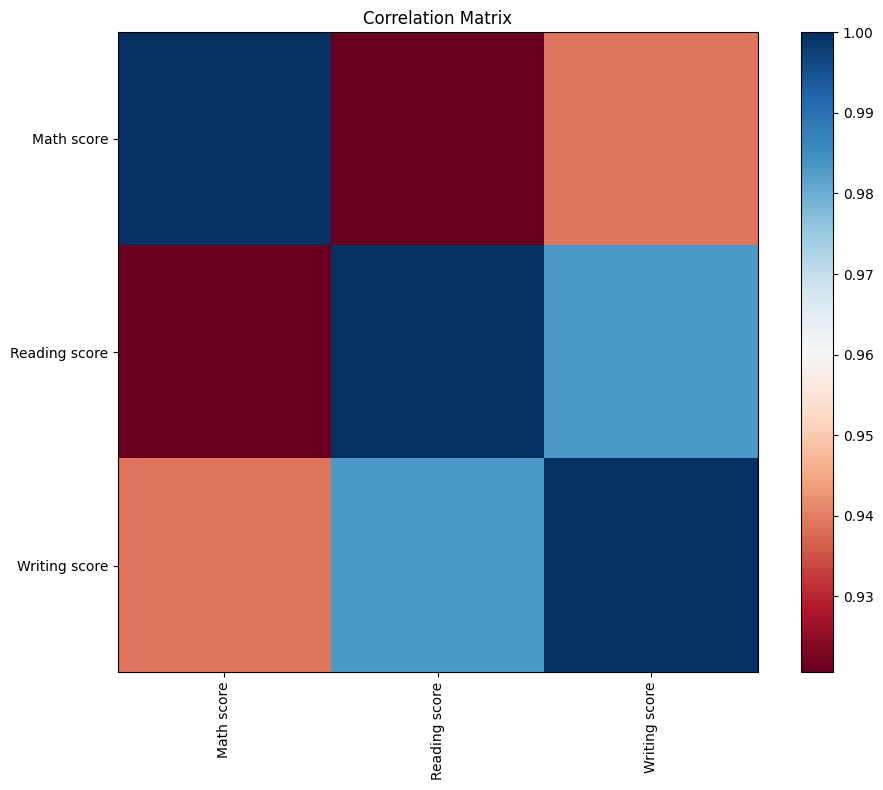

In [46]:
corr = df.corr()
print(corr)
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap=cm.RdBu, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


object_cols = df.select_dtypes(include=['object']).columns
print("Nominal columns: ", object_cols)
for col in object_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
print(df.head())

Nominal columns:  Index(['Gender', 'Race/ethnicity', 'Parental level of education', 'Lunch',
       'Test preparation course'],
      dtype='object')
   Gender  Race/ethnicity  Parental level of education  Lunch  \
0       0               1                            1      1   
1       0               2                            4      0   
2       0               1                            3      0   
3       1               0                            0      1   
4       1               2                            4      1   

   Test preparation course  Math score  Reading score  Writing score  
0                        0          72             72             74  
1                        1          69             90             88  
2                        0          90             95             93  
3                        1          47             57             44  
4                        1          76             78             75  


                               Gender  Race/ethnicity  \
Gender                       1.000000        0.082101   
Race/ethnicity               0.082101        1.000000   
Parental level of education  0.041129        0.036020   
Lunch                        0.031553        0.015728   
Test preparation course      0.093303        0.045108   
Math score                  -0.214211       -0.024946   
Reading score               -0.405080       -0.049014   
Writing score               -0.385808       -0.044985   

                             Parental level of education     Lunch  \
Gender                                          0.041129  0.031553   
Race/ethnicity                                  0.036020  0.015728   
Parental level of education                     1.000000 -0.122341   
Lunch                                          -0.122341  1.000000   
Test preparation course                         0.160055 -0.214056   
Math score                                     -0.155036  0.128816

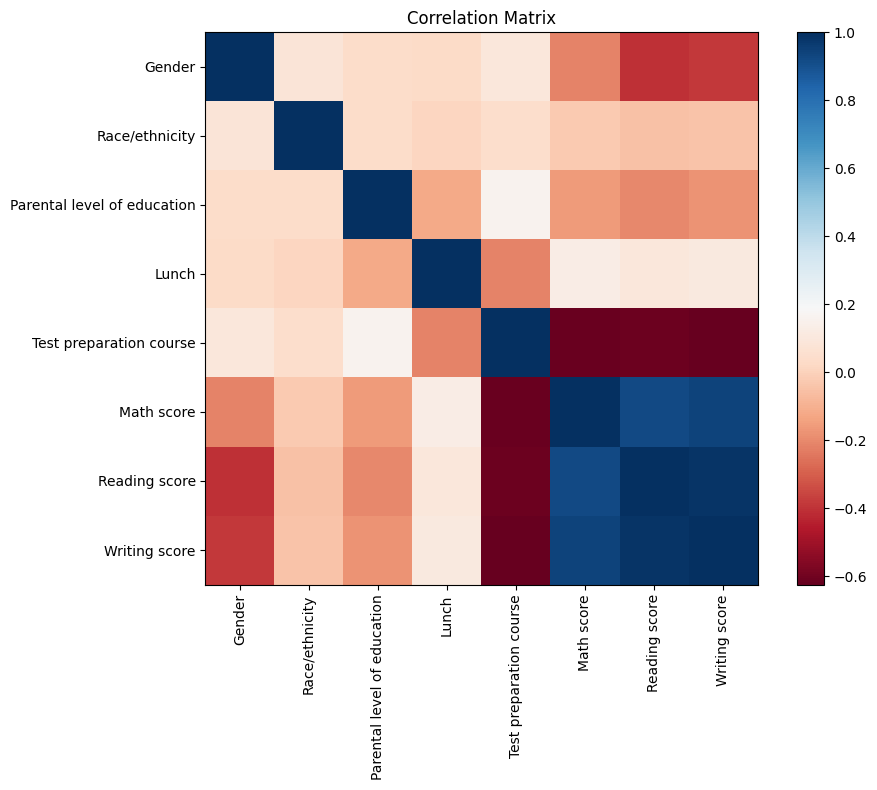

In [48]:
correlation = df.corr()
print(correlation)
plt.figure(figsize=(10, 8))
plt.imshow(correlation, cmap=cm.RdBu, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [49]:
target = 'Math score'
correlation_target = correlation[target].sort_values(ascending=False)
print(correlation_target)

Math score                     1.000000
Writing score                  0.938897
Reading score                  0.920590
Lunch                          0.128816
Race/ethnicity                -0.024946
Parental level of education   -0.155036
Gender                        -0.214211
Test preparation course       -0.617231
Name: Math score, dtype: float64


In [50]:
low_corr_cols = correlation_target[abs(correlation_target) < 0.1].index.tolist()
print("Low correlation columns: ", low_corr_cols)
df = df.drop(low_corr_cols, axis=1)
print(df.head())

Low correlation columns:  ['Race/ethnicity']
   Gender  Parental level of education  Lunch  Test preparation course  \
0       0                            1      1                        0   
1       0                            4      0                        1   
2       0                            3      0                        0   
3       1                            0      1                        1   
4       1                            4      1                        1   

   Math score  Reading score  Writing score  
0          72             72             74  
1          69             90             88  
2          90             95             93  
3          47             57             44  
4          76             78             75  


## Grouping output

In [51]:
#group the data according to Math score
grouped = [0,50,75,100]
group_names = ['Failing','Passing','Excellent']
df['Math score'] = pd.cut(df['Math score'], bins=grouped, labels=group_names, include_lowest=True)
print(df.head())

   Gender  Parental level of education  Lunch  Test preparation course  \
0       0                            1      1                        0   
1       0                            4      0                        1   
2       0                            3      0                        0   
3       1                            0      1                        1   
4       1                            4      1                        1   

  Math score  Reading score  Writing score  
0    Passing             72             74  
1    Passing             90             88  
2  Excellent             95             93  
3    Failing             57             44  
4  Excellent             78             75  


In [52]:
df['Math score'] = LabelEncoder().fit_transform(df['Math score'])
print(df.head())

   Gender  Parental level of education  Lunch  Test preparation course  \
0       0                            1      1                        0   
1       0                            4      0                        1   
2       0                            3      0                        0   
3       1                            0      1                        1   
4       1                            4      1                        1   

   Math score  Reading score  Writing score  
0           2             72             74  
1           2             90             88  
2           0             95             93  
3           1             57             44  
4           0             78             75  


# Split dataset to X and Y

In [53]:
X = df.drop('Math score', axis=1)
y = df['Math score']
print(X.head())
print(y.head())

   Gender  Parental level of education  Lunch  Test preparation course  \
0       0                            1      1                        0   
1       0                            4      0                        1   
2       0                            3      0                        0   
3       1                            0      1                        1   
4       1                            4      1                        1   

   Reading score  Writing score  
0             72             74  
1             90             88  
2             95             93  
3             57             44  
4             78             75  
0    2
1    2
2    0
3    1
4    0
Name: Math score, dtype: int32


# Train-Test-Validation Split

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (165, 6)
X_test shape:  (42, 6)
y_train shape:  (165,)
y_test shape:  (42,)


# Standart Scaler

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (165, 6)
X_test shape:  (21, 6)
y_train shape:  (165,)
y_test shape:  (21,)


# MinMax Scaler

In [66]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (165, 6)
X_test shape:  (42, 6)
y_train shape:  (165,)
y_test shape:  (42,)


# Model Creation

In [67]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential(
    layers=[
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(3, activation='softmax')
    ]
)

In [69]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training Part

In [70]:
batch_size = 16
epochs = 100
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1,validation_data=(X_test, y_test))

Epoch 1/100
11/11 [==============================] - 1s 14ms/step - loss: 1.0740 - accuracy: 0.3879 - val_loss: 1.0055 - val_accuracy: 0.4524
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.9255 - accuracy: 0.6182 - val_loss: 0.9481 - val_accuracy: 0.4524
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.8598 - accuracy: 0.6121 - val_loss: 0.9301 - val_accuracy: 0.4524
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.8061 - accuracy: 0.6303 - val_loss: 0.8942 - val_accuracy: 0.4524
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7703 - accuracy: 0.6545 - val_loss: 0.8489 - val_accuracy: 0.5952
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7842 - accuracy: 0.6727 - val_loss: 0.7863 - val_accuracy: 0.7619
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.7159 - accuracy: 0.7030 - val_loss: 0.7539 - val_accuracy: 0.7619
Epoch 8/100


# Plotting Loss and Accuracy

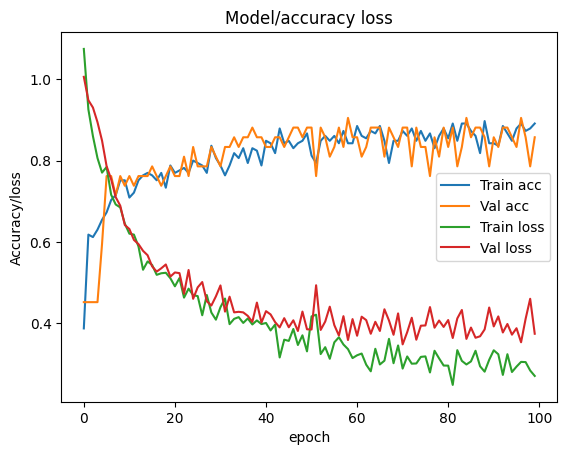

In [71]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model/accuracy loss")
plt.ylabel("Accuracy/loss")
plt.xlabel("epoch")
plt.legend(["Train acc","Val acc","Train loss","Val loss"],loc="center right")
plt.show()

# Prediction

In [72]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print("y_pred: ", y_pred)
print("y_test: ", y_test.values)

2/2 [==============================] - 0s 0s/step
y_pred:  [0 1 0 2 2 2 2 0 0 0 2 2 2 2 1 2 0 2 2 2 0 0 0 0 0 2 2 0 1 0 2 2 2 2 0 2 2
 1 0 2 0 1]
y_test:  [2 1 0 2 2 1 2 0 0 0 2 2 2 2 1 2 0 2 0 0 0 0 0 0 0 2 2 0 2 0 2 2 2 2 0 0 2
 1 0 2 0 1]


# Confusion Matrix

Confusion matrix:  [[15  0  3]
 [ 0  4  1]
 [ 1  1 17]]


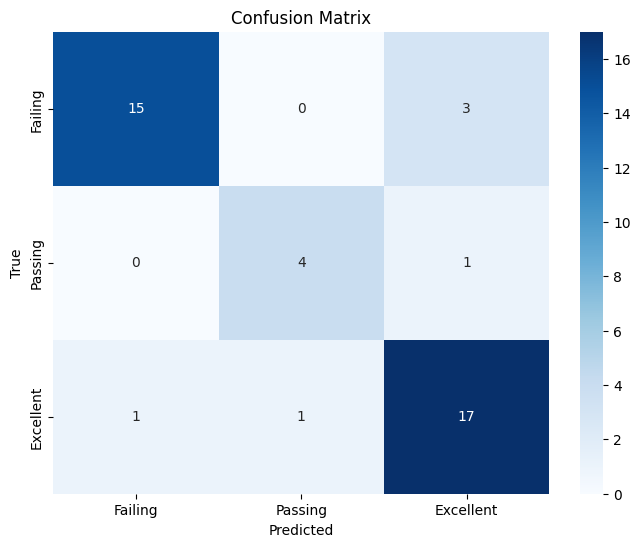

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: ", cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=group_names, yticklabels=group_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report

In [74]:
#Classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(classification_report(y_test, y_pred, target_names=group_names))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score: ", f1)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision: ", precision)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall: ", recall)

              precision    recall  f1-score   support

     Failing       0.94      0.83      0.88        18
     Passing       0.80      0.80      0.80         5
   Excellent       0.81      0.89      0.85        19

    accuracy                           0.86        42
   macro avg       0.85      0.84      0.84        42
weighted avg       0.86      0.86      0.86        42

Accuracy:  0.8571428571428571
F1 score:  0.8579131652661064
Precision:  0.8632369614512472
Recall:  0.8571428571428571
